#  Investigating the Anscombe's Quartet
## Author:      Francis Adepoju (G00364694)
## Start Date: Oct 24, 2018

# Abstract:

### Visualization may not be as precise as statistics, but it provides a unique view onto data that can make it much easier to discover interesting structures than numerical methods. Visualization also provides the context necessary to make better choices and to be more careful when fitting models. Anscombe’s Quartet is a case in point, showing that four datasets that have identical statistical properties can indeed be very different.

# Background:
Arguing for Graphics in 1973 - In 1973, Francis J. Anscombe published a paper titled, Graphs in Statistical Analysis. The idea of using graphical methods had been established relatively recently by John Tukey, but there was evidently still a lot of skepticism. Anscombe first lists some notions that textbooks were “indoctrinating” people with, like the idea that “numerical calculations are exact, but graphs are rough.”
He then presents a table of numbers. It contains four distinct datasets (hence the name Anscombe’s Quartet), each with statistical properties that are essentially identical: the mean of the x values is 9.0, mean of y values is 7.5, they all have nearly identical variances, correlations, and regression lines (to at least two decimal places).[1]
But when plotted, they suddenly appear very different (see below plots).


- While dataset I appears like many well-behaved datasets that have clean and well-fitting linear models, the others are not served nearly as well. 
- Dataset II does not have a linear correlation; 
- dataset III does, but the linear regression is thrown off by an outlier. It would be easy to fit a correct linear model, if only the outlier were spotted and removed before doing so. 
- Dataset IV, finally, does not fit any kind of linear model, but the single outlier makes keeps the alarm from going off.

## How do you find out which model can be applied? 
Anscombe’s answer is to use graphs: looking at the data immediately reveals a lot of the structure, and makes the analyst aware of “pathological” cases like dataset IV. Computers are not limited to running numerical models, either.


In addition to showing how useful a clear look onto data can be, Anscombe also raises an interesting question: 
### what, exactly, is an outlier? 
He describes a study on education, where he studied per-capita expenditures for public schools in the 50 U.S. states and the District of Columbia. Alaska is a bit of an outlier, so it moves the regression line away from the mainstream. The obvious response would be to remove Alaska from the data before computing the regression. But then, another state will be an outlier. Where do you stop?
- Anscombe argues that the correct answer is to show both the regression with Alaska, but also how much it contributes and what happens when it is removed. 
- The tool here, again, are graphical representations. 
- Not only the actual data needs to be shown, but also the distances from the regression line (the residuals), and other statistics that help judge how well the model fits. It seems like an obvious thing to do, but presumably was not the norm in the 1970s.


# Import Libraries and load the anscombe Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.linalg as sl

# !!!
# Works... Can load these datasets from seaborn libraries!!!
#import seaborn as sns
#irisData = sns.load_dataset("iris")
#print(irisData)

In [2]:
# Load the anscombes dataset
# df = pd.read_csv("https://github.com/dewaledr/FDAnalysis/blob/master/anscombeHeaded.csv")
# df = pd.read_csv("https://raw.githubusercontent.com/dewaledr/FDAnalysis/master/anscombeHeaded.csv")
# df  = pd.read_csv("anscombeHeaded.csv")

sns.set_context("talk")
anscombe = sns.load_dataset("anscombe")
#print(anscombe)

In [3]:
#df

# STEP-1 

For each of the four datasets： 
Compute the mean and variance of both x and y 
Compute the correlation coefficient between x and y 
Compute the linear regression line: y = A + Cx + ϵ [2]


In [4]:
print("mean:")
print(anscombe.groupby("dataset").mean())
print("=======================")
print("variance:")
print(anscombe.groupby("dataset").var())
print("=======================")
print("correlation coefficient:")
print(anscombe.groupby("dataset").x.corr(anscombe.y))

mean:
           x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909
variance:
            x         y
dataset                
I        11.0  4.127269
II       11.0  4.127629
III      11.0  4.122620
IV       11.0  4.123249
correlation coefficient:
dataset
I      0.816421
II     0.816237
III    0.816287
IV     0.816521
Name: x, dtype: float64


In [5]:
#linear regression line [2]
setx    = np.zeros((4,11))
setx[0] = anscombe[0:11].x
setx[1] = anscombe[11:22].x
setx[2] = anscombe[22:33].x
setx[3] = anscombe[33:44].x
sety    = np.zeros((4,11))
sety[0] = anscombe[0:11].y
sety[1] = anscombe[11:22].y
sety[2] = anscombe[22:33].y
sety[3] = anscombe[33:44].y
for i in range(0,4):
    Y = sety[i]
    X = setx[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    print("Linear regression line of dataset " + str(i+1))
    print("y = " + str(results.params[0]) + "+" + str(results.params[1]) + "x")


Linear regression line of dataset 1
y = 3.0000909090909085+0.5000909090909091x
Linear regression line of dataset 2
y = 3.0009090909090905+0.5x
Linear regression line of dataset 3
y = 3.0024545454545453+0.49972727272727285x
Linear regression line of dataset 4
y = 3.0017272727272752+0.49990909090909075x


# Step-2

In [6]:
# Using Seaborn, visualize all four datasets. 
# hint: use sns.FacetGrid combined with plt.scatter

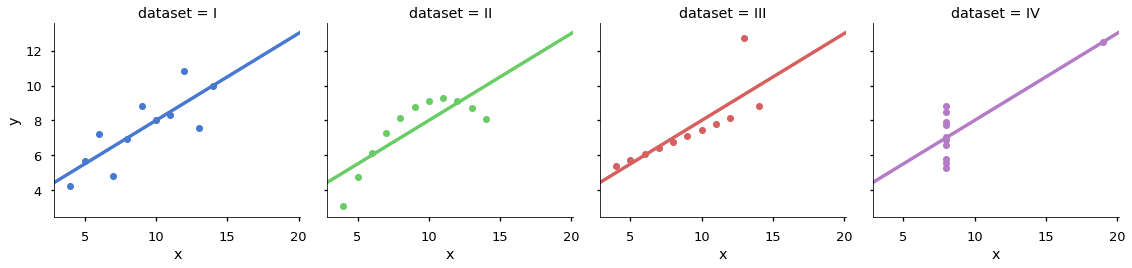

In [7]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=4, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()


# Summary - The Significance of the Anscombe Quartet:
As observed in step-1, the four plots all have the same means, variances, and correlation.[3]
Overall moral: first- and second-order summary statistics do not often say everything you might want to know about your data, so remember to plot it.

The last two plots show that these summary statistics are sensitive to outliers. This kind of generalization arises often in real life: you might have, say, two noisy clouds corresponding to two groups. You observe a correlation induced by the grouping, but after controlling for the group, the correlation disappears.

The second plot shows that, even though we are taught that correlation measures a linear association between two variables, we can have high correlations (0.816 in this case) even when the relationship is nonlinear.


## REFERENCES:
- [1] https://eagereyes.org/criticism/anscombes-quartet
- [2] https://blog.csdn.net/gleam_/article/details/80636182
- [3] https://www.quora.com/What-is-the-significance-of-Anscombes-quartet

# END